# scrape data from twitter using twitter api

In [91]:
import json
import csv
import tweepy
import re


In [92]:
"""
INPUTS:
    consumer_key, consumer_secret, access_token, access_token_secret: codes 
    telling twitter that we are authorized to access this data
    hashtag_phrase: the combination of hashtags to search for
OUTPUTS:
    none, simply save the tweet info to a spreadsheet
"""
def search_for_hashtags(consumer_key, consumer_secret, access_token, access_token_secret, hashtag_phrase):
    
    #create authentication for accessing Twitter
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    #initialize Tweepy API
    api = tweepy.API(auth)
    
    #get the name of the spreadsheet we will write to
    fname = '_'.join(re.findall(r"#(\w+)", hashtag_phrase))

    #open the spreadsheet we will write to
    with open('%s.csv' % (fname), 'w') as file:

        w = csv.writer(file)

        #write header row to spreadsheet
        w.writerow(['timestamp', 'tweet_text', 'username',  'followers_count'])

        #for each tweet matching our hashtags, write relevant info to the spreadsheet
        for tweet in tweepy.Cursor(api.search, q=hashtag_phrase+' -filter:retweets', \
                                   lang="en", tweet_mode='extended').items(100):
            w.writerow([tweet.created_at, tweet.full_text.replace('\n',' ').encode('utf-8'), tweet.user.screen_name.encode('utf-8'), tweet.user.followers_count])

In [16]:
consumer_key = input('Consumer Key ')
consumer_secret = input('Consumer Secret ')
access_token = input('Access Token ')
access_token_secret = input('Access Token Secret ')
    
hashtag_phrase = input('Hashtag Phrase ')

if __name__ == '__main__':
    search_for_hashtags(consumer_key, consumer_secret, access_token, access_token_secret, hashtag_phrase)

Consumer Key dclGMUCZTpRBUaaN49llBtdk0
Consumer Secret AtGMspDbmAGJ0gOWPnSeXfhVBudZod8T0As9529y4jy2dGREfH
Access Token 1319918565273849856-qZ7H2hyAiQJcZMNI9BKMy7DLZcxiK3
Access Token Secret 8HxRIzaYef9ubUbGJXj0DfpCxcV5twEo4R2vB1xVfsBol
Hashtag Phrase #republic


# sentiment analysis for republic tv

In [78]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
import pandas as pd 

In [79]:

analyzer = SentimentIntensityAnalyzer()


In [80]:
df_republic = pd.read_csv("C:/Users/user/republic.csv")

In [81]:
df_republic.head()

,timestamp,tweet_text,username,followers_count
0,2020-10-24 12:36:12,b'#Republic Literacy? Constitution and Parliam...,b'MangalSainHanda',132
1,2020-10-24 12:28:35,b'A constitutional #republic is a type of gove...,b'StephenJett2',2
2,2020-10-24 12:28:18,b'@eoinyk Import duty taxes will also apply to...,b'Francophile_IRL',57
3,2020-10-24 12:13:42,b'Can you imagine how many more #USA citizens ...,b'MediaActive',2905
4,2020-10-24 12:13:10,b'This is a #powerful documentary #how #Commun...,b'kukiszabolcs',407


In [82]:
df_republic['tweet_text']= df_republic['tweet_text'].str.lower()
df_republic['username']= df_republic['username'].str.lower()


In [83]:
#remove punctuations 
df_republic['tweet_text'] = df_republic['tweet_text'].str.replace('[^\w\s]','')
df_republic=df_republic.drop('username',axis=1)

df_republic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        100 non-null    object
 1   tweet_text       100 non-null    object
 2   followers_count  100 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [85]:
#vader sentiment analysis


sentiment_republic = df_republic['tweet_text'].apply(lambda x: analyzer.polarity_scores(x))
df_rep_final= pd.concat([df_republic, sentiment_republic.apply(pd.Series)],1)
df_rep_final.head()

,timestamp,tweet_text,followers_count,neg,neu,pos,compound
0,2020-10-24 12:36:12,brepublic literacy constitution and parliament...,132,0.209,0.736,0.055,-0.7579
1,2020-10-24 12:28:35,ba constitutional republic is a type of govern...,2,0.000,1.000,0.000,0.0000
2,2020-10-24 12:28:18,beoinyk import duty taxes will also apply to g...,57,0.025,0.932,0.044,0.2500
3,2020-10-24 12:13:42,bcan you imagine how many more usa citizens wi...,2905,0.171,0.769,0.060,-0.7096
4,2020-10-24 12:13:10,bthis is a powerful documentary how communist ...,407,0.000,0.792,0.208,0.6705


0.09145700000000001


0.11515

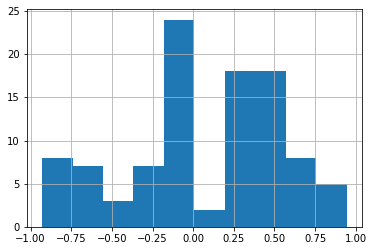

In [88]:
#visualization of sentiments using compound score
df_rep_final['compound'].hist()
print(df_rep_final['compound'].mean())
df_rep_final['compound'].median()

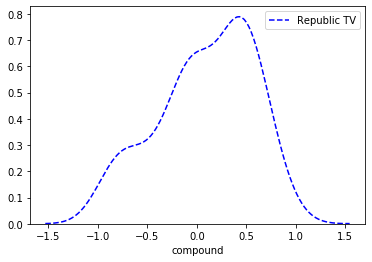

In [89]:
sns.distplot(df_rep_final['compound'], bins=15, hist = False, label = 'Republic TV', color ='blue',  kde_kws={'linestyle':'--'})

# for Aaj tak


In [94]:
consumer_key = input('Consumer Key ')
consumer_secret = input('Consumer Secret ')
access_token = input('Access Token ')
access_token_secret = input('Access Token Secret ')
    
hashtag_phrase = input('Hashtag Phrase ')

if __name__ == '__main__':
    search_for_hashtags(consumer_key, consumer_secret, access_token, access_token_secret, hashtag_phrase)

Consumer Key dclGMUCZTpRBUaaN49llBtdk0
Consumer Secret AtGMspDbmAGJ0gOWPnSeXfhVBudZod8T0As9529y4jy2dGREfH
Access Token 1319918565273849856-qZ7H2hyAiQJcZMNI9BKMy7DLZcxiK3
Access Token Secret 8HxRIzaYef9ubUbGJXj0DfpCxcV5twEo4R2vB1xVfsBol
Hashtag Phrase #aajtak


# sentiment analysis for aajtak


In [95]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
import pandas as pd 

In [96]:
analyzer = SentimentIntensityAnalyzer()


In [97]:
df_aajtak = pd.read_csv("C:/Users/user/aajtak.csv")

In [98]:
df_aajtak['tweet_text']= df_aajtak['tweet_text'].str.lower()
df_aajtak['username']= df_aajtak['username'].str.lower()
df_aajtak.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        100 non-null    object
 1   tweet_text       100 non-null    object
 2   username         100 non-null    object
 3   followers_count  100 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


In [100]:
#remove punctuations 
df_aajtak['tweet_text'] = df_republic['tweet_text'].str.replace('[^\w\s]','')
df_aajtak=df_aajtak.drop('username',axis=1)

In [101]:
#vader sentiment analysis


sentiment_aajtak = df_aajtak['tweet_text'].apply(lambda x: analyzer.polarity_scores(x))
df_aaj_final= pd.concat([df_aajtak, sentiment_aajtak.apply(pd.Series)],1)
df_aaj_final.head()

,timestamp,tweet_text,followers_count,neg,neu,pos,compound
0,2020-10-25 11:56:19,brepublic literacy constitution and parliament...,205,0.209,0.736,0.055,-0.7579
1,2020-10-25 11:47:05,ba constitutional republic is a type of govern...,4,0.000,1.000,0.000,0.0000
2,2020-10-25 11:40:51,beoinyk import duty taxes will also apply to g...,13,0.025,0.932,0.044,0.2500
3,2020-10-25 11:09:16,bcan you imagine how many more usa citizens wi...,1,0.171,0.769,0.060,-0.7096
4,2020-10-25 11:08:50,bthis is a powerful documentary how communist ...,1,0.000,0.792,0.208,0.6705


0.09145700000000001


0.11515

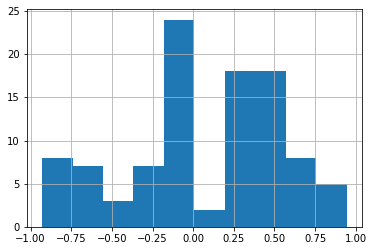

In [102]:
#visualization of sentiments using compound score
df_aaj_final['compound'].hist()
print(df_aaj_final['compound'].mean())
df_aaj_final['compound'].median()

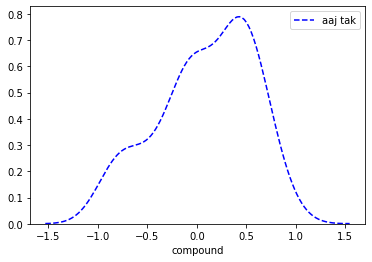

In [105]:
sns.distplot(df_aaj_final['compound'], bins=15, hist = False, label = 'aaj tak', color ='blue',  kde_kws={'linestyle':'--'})

# comparing these two leading channels by using tweets from twitter (via student registration in twitter api ) . we can visualize that the leading news channel try to go about same points for there reports , hence cannot see a significant variation between them . But individually if we have to say they both a signficant negative and positive sentiment across the twitter community and compound is positive for most part .